<a href="https://colab.research.google.com/github/chieri7/Machine-Learning-Final-Code/blob/main/Machine_Learning_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

Raw Data

In [46]:
# Raw Data
path = "Lung Cancer Dataset.csv"
df = pd.read_csv(path)

In [47]:
df.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [48]:
df.shape

(5000, 18)

Observation : There are 5000 rows, 18 columns including 1 target column in this data set

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [50]:
df.duplicated().sum()

np.int64(0)

No duplicates found

In [51]:
df.isna().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


No null rows found

**Summary Statistics**

In [52]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [53]:
# Counts
df['PULMONARY_DISEASE'].value_counts(normalize= True)

,proportion
PULMONARY_DISEASE,
NO,0.5926
YES,0.4074


This is a fairly Balanced dataset

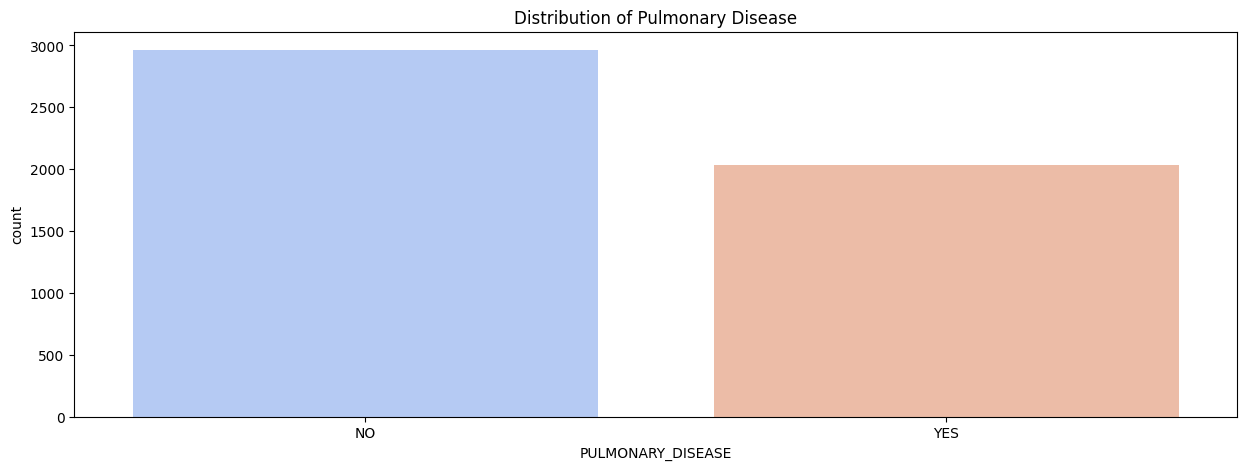

In [54]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['PULMONARY_DISEASE'], palette="coolwarm")
plt.title("Distribution of Pulmonary Disease")
plt.show()

The difference in the number of samples between the classes is around 1000, meaning the "no disease" class has 1.5 times more samples than the "disease" class. This is generally not a problem, especially when the sample size is large. Many machine learning algorithms, such as decision trees and random forests, are quite robust to this kind of mild imbalance.So this doesnt require the handling of imbalanced data.

<Axes: >

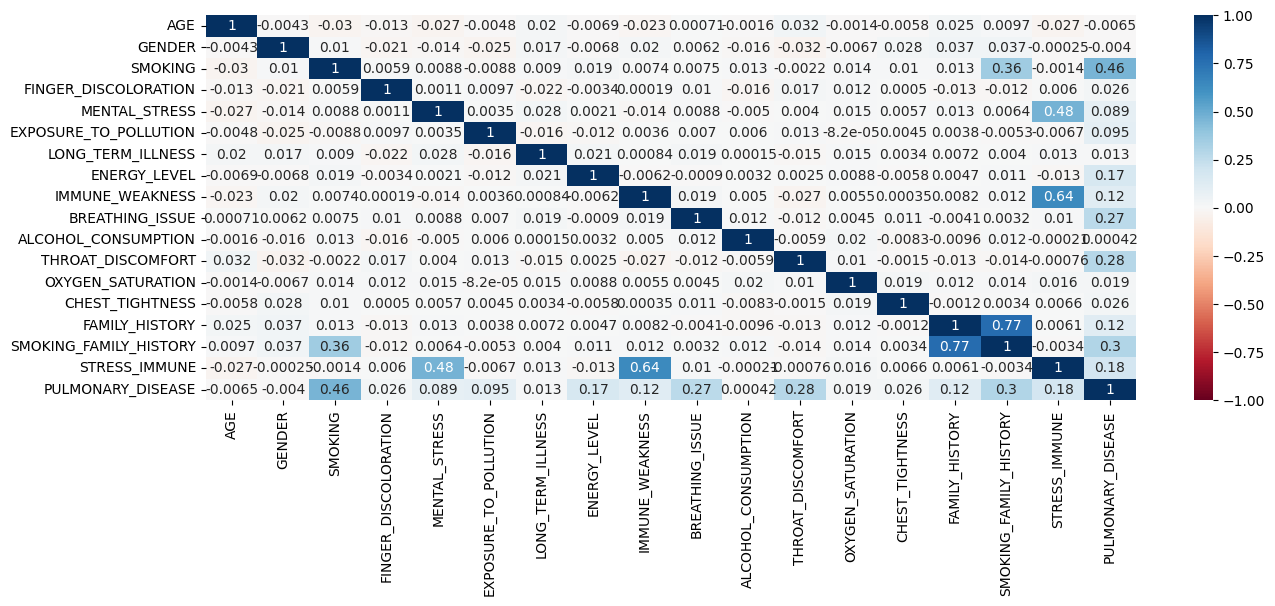

In [55]:
v = df.copy()
v['PULMONARY_DISEASE'] = pd.get_dummies(v['PULMONARY_DISEASE'],dtype=int,drop_first=True)
plt.figure(figsize=(15, 5))
sns.heatmap(v.corr(), annot=True, cmap="RdBu",vmin=-1,)

Smoking, Breathing Issue, Throat discomfort, and Smoking Family history show the highest correlation with the Target.

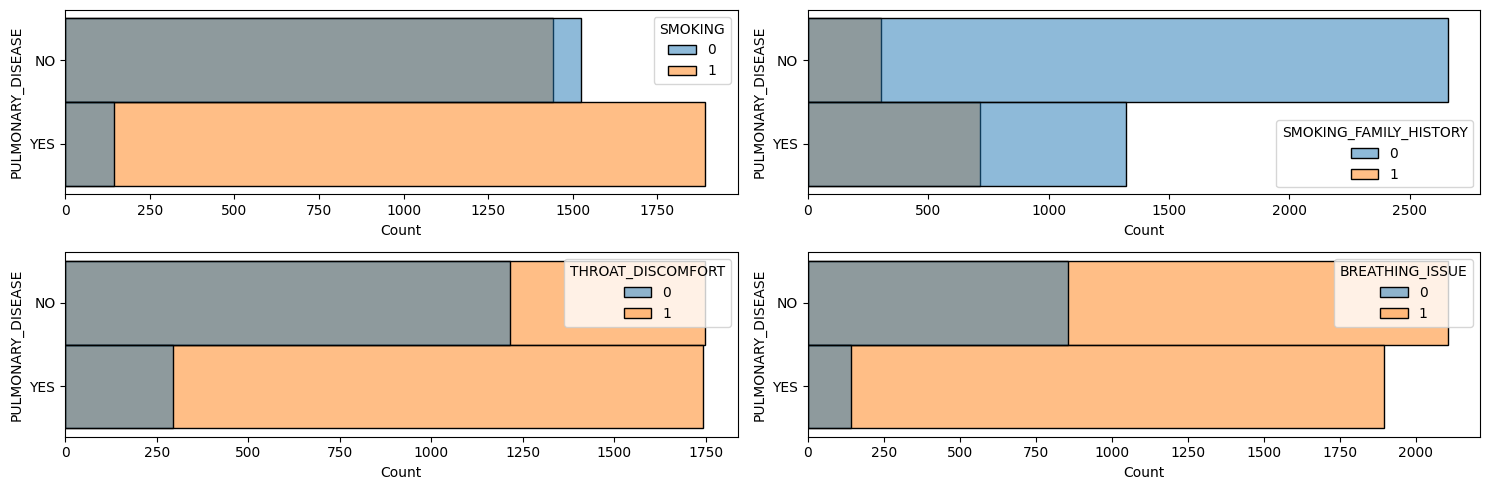

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
sns.histplot(hue= df['SMOKING'],y =df['PULMONARY_DISEASE'],ax=axes[0][0])

sns.histplot(hue= df['SMOKING_FAMILY_HISTORY'],y =df['PULMONARY_DISEASE'],ax=axes[0][1])

sns.histplot(hue= df['THROAT_DISCOMFORT'],y =df['PULMONARY_DISEASE'],ax=axes[1][0])

sns.histplot(hue= df['BREATHING_ISSUE'],y= df['PULMONARY_DISEASE'],ax=axes[1][1])

plt.tight_layout()
plt.show()

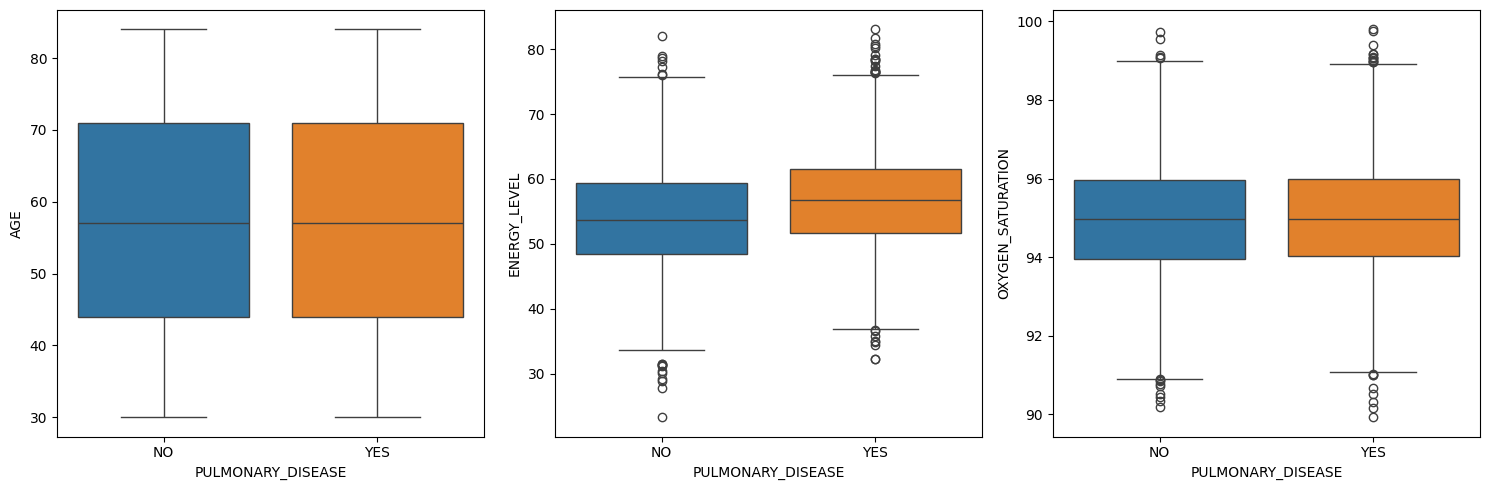

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y= df['AGE'], x=df['PULMONARY_DISEASE'], showfliers=True, ax=axes[0], hue=df['PULMONARY_DISEASE'])
sns.boxplot(y= df['ENERGY_LEVEL'], x=df['PULMONARY_DISEASE'], showfliers=True, ax=axes[1], hue=df['PULMONARY_DISEASE'])
sns.boxplot(y= df['OXYGEN_SATURATION'], x=df['PULMONARY_DISEASE'], showfliers=True, ax=axes[2], hue=df['PULMONARY_DISEASE'])

plt.tight_layout()
plt.show()


In [58]:
def processing(d):
  df_processed = d.copy()
  df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)
  scaler = MinMaxScaler()
  data = df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
  scaler.fit(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']] = scaler.transform(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]

  return df_processed

In [59]:
df_full = processing(df)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   float64
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

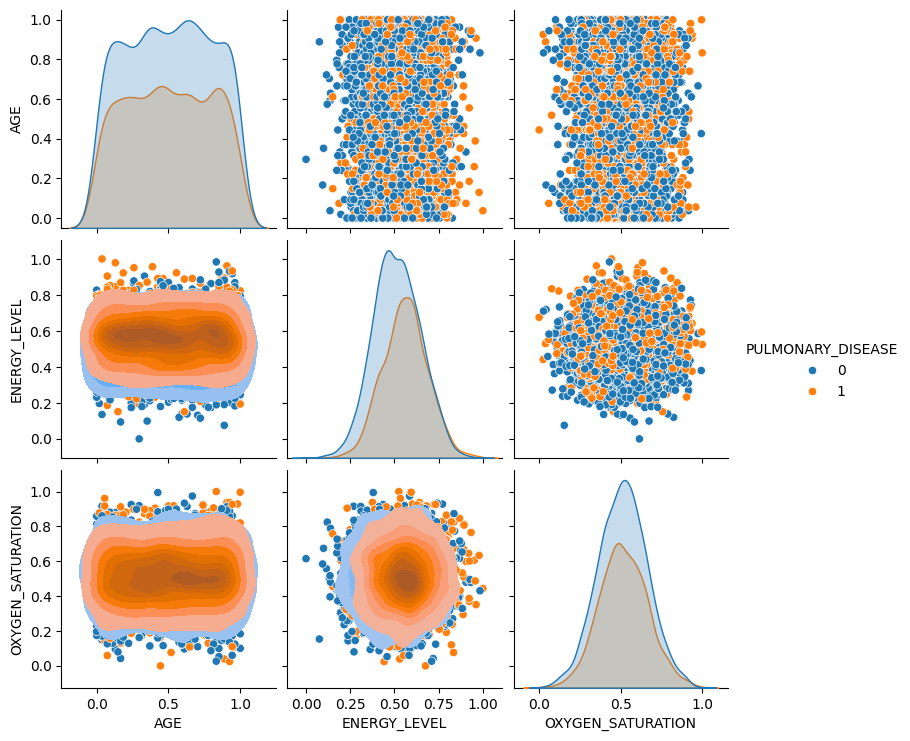

In [60]:
g=sns.pairplot(df_full,vars=['AGE','ENERGY_LEVEL','OXYGEN_SATURATION'],hue='PULMONARY_DISEASE')
g.map_lower(sns.kdeplot, fill=True)

plt.show()


**Modelling**

Imports

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, confusion_matrix, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import pickle


In [62]:
# Train Test split
X = df.drop(columns='PULMONARY_DISEASE')
y = df[['PULMONARY_DISEASE']]

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2 ,stratify = y,random_state=42)

X_tr, X_val ,y_tr, y_val = train_test_split(X_train,y_train, test_size = 0.25 ,stratify = y_train,random_state=42)

In [63]:
# Processing function:

def preProcessing(d,inp_type):

  df_processed = d.copy()


  #target :
  if inp_type == 'target' :
    df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)
    return df_processed


  #normalisation :
  if inp_type == 'feature' :
    # scaler = MinMaxScaler()
    # data = df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
    # scaler.fit(data)
    # df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']] = scaler.transform(data)
    # df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
    return df_processed


  print("ERROR : undefined input type ")
  return

Preprocessing

In [64]:
## Preprocessing
# y
y_train = preProcessing(y_train,'target')
y_tr = preProcessing(y_tr,'target')
y_val = preProcessing(y_val,'target')
y_test = preProcessing(y_test,'target')

# X
X_train = preProcessing(X_train,'feature')
X_tr = preProcessing(X_tr,'feature')
X_val = preProcessing(X_val,'feature')
X_test = preProcessing(X_test,'feature')

Hyperparameter tuning

In [65]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

params = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    },

    'Random Forest': {
        'n_estimators': [50, 75, 100, 200, 300, 500],
        'max_depth': [2, 3, 4, 5, 6]
    },

    'AdaBoost': {
        'n_estimators': [50, 100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2]
    },

    'XGBoost': {
        'n_estimators': [50, 75, 100, 200, 300, 400, 500],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    }
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv = 5

Grid Search

In [66]:
def result_df(models,params,scoring,refitting_metric,cv,X_tr,y_tr):

  results_table = pd.DataFrame(columns = ['Model','accuracy', 'precision', 'recall', 'f1','roc_auc_score','model_object'] )

  for model_name, model in models.items():

    mod = GridSearchCV(
    model,
    params[model_name],
    scoring =scoring,
    cv=cv,
    refit = refitting_metric,
    n_jobs=20
    )

    mod.fit(X_tr,y_tr)
    model_tuned = mod.best_estimator_

    # Pickle:
    with open(model_name, 'wb') as to_write:
      pickle.dump(model_tuned, to_write)

    with open(model_name, 'rb') as to_read:
      model_tuned = pickle.load(to_read)

    model_tuned_preds = model_tuned.predict(X_val)



    accuracy = accuracy_score(y_val,model_tuned_preds)
    precision = precision_score(y_val,model_tuned_preds)
    f1 = f1_score(y_val,model_tuned_preds)
    recall = recall_score(y_val,model_tuned_preds)
    roc = roc_auc_score(y_val,model_tuned_preds)

    results_table.loc[len(results_table)] = [model_name,accuracy, precision, f1, recall, roc,mod.best_params_]

  return results_table

In [67]:
results = result_df(models,params,scoring,"recall",cv,X_tr,y_tr)

In [68]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

results.sort_values(by=['recall','f1','accuracy', 'precision'],ascending =False,inplace=True)
print(results)

                 Model  accuracy  precision    recall        f1  roc_auc_score  \
3              XGBoost     0.909   0.911458  0.884956  0.859951       0.901308   
1        Random Forest     0.895   0.899471  0.866242  0.835381       0.885650   
0  Logistic Regression     0.889   0.883420  0.860025  0.837838       0.880976   
2             AdaBoost     0.679   0.565749  0.697455  0.909091       0.715085   

                                                                           model_object  
3  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}  
1                                                 {'max_depth': 6, 'n_estimators': 200}  
0                             {'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}  
2                                           {'learning_rate': 0.01, 'n_estimators': 50}  


**Final Model**

Accuracy  : 0.91
Precision : 0.88
F1 Score  : 0.88
Recall    : 0.88
ROC AUC   : 0.90
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       593
           1       0.88      0.88      0.88       407

    accuracy                           0.91      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.91      0.90      1000

Confusion Matrix :


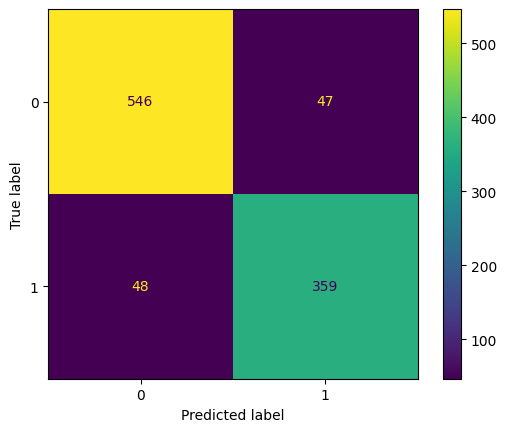

In [69]:
with open('XGBoost', 'rb') as to_read:
    mod = pickle.load(to_read)

mod.fit(X_train, y_train)
y_preds = mod.predict(X_test)

print(f"Accuracy  : {accuracy_score(y_test, y_preds):.2f}")
print(f"Precision : {precision_score(y_test, y_preds):.2f}")
print(f"F1 Score  : {f1_score(y_test, y_preds):.2f}")
print(f"Recall    : {recall_score(y_test, y_preds):.2f}")
print(f'ROC AUC   : {roc_auc_score(y_test, y_preds):.2f}')

print("Classification Report :")
print(classification_report(y_test, y_preds))

print("Confusion Matrix :")
cm = confusion_matrix(y_test, y_preds, labels=mod.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod.classes_)
disp.plot()

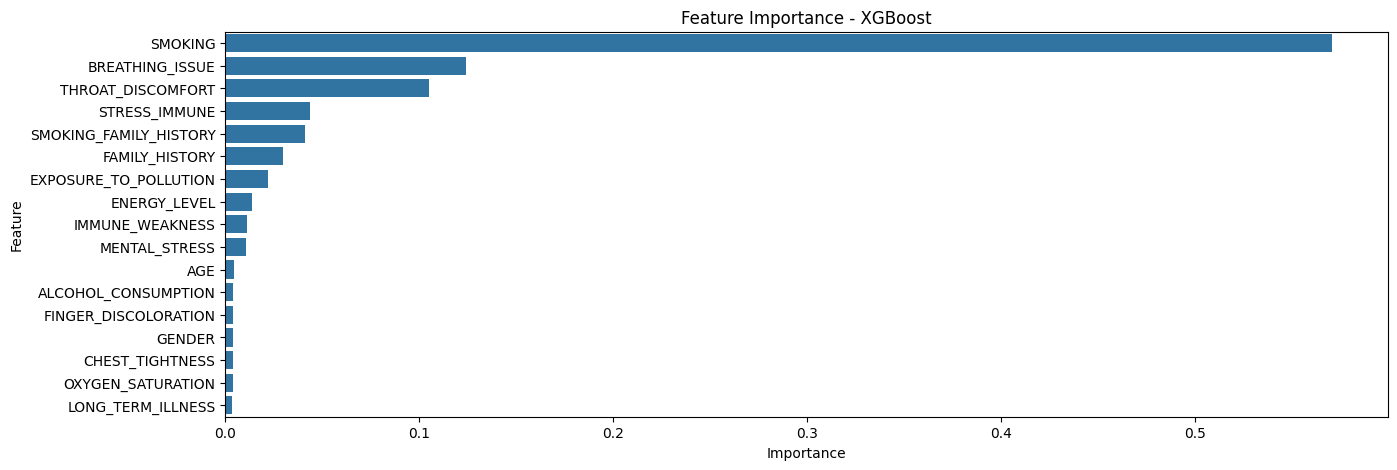

In [70]:
feature_importances = mod.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - XGBoost')
plt.show()

SHAP interpretability analysis

In [71]:
import shap

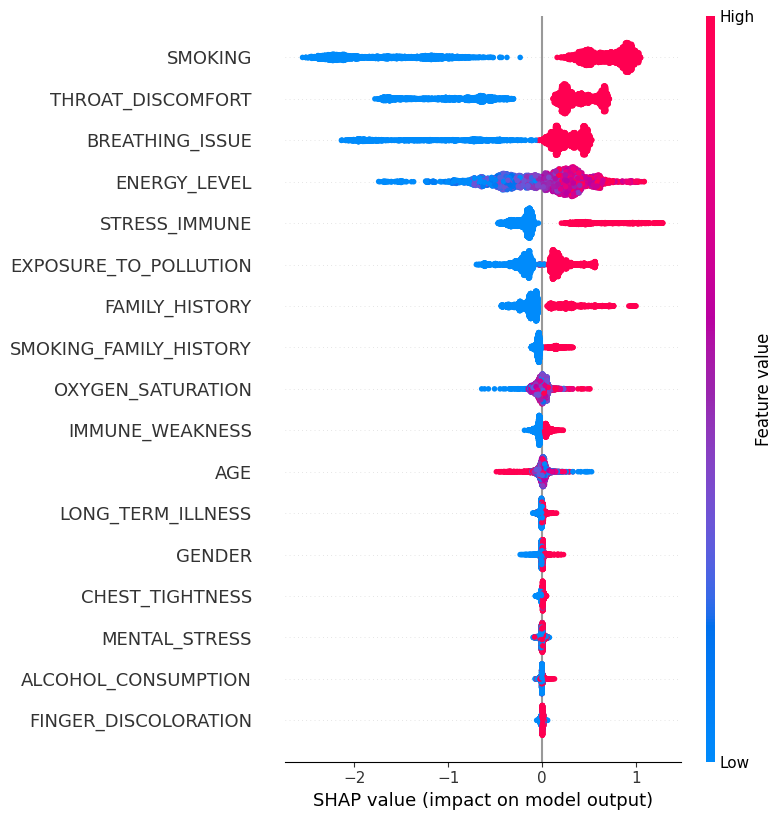

In [72]:
explainer = shap.TreeExplainer(mod)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

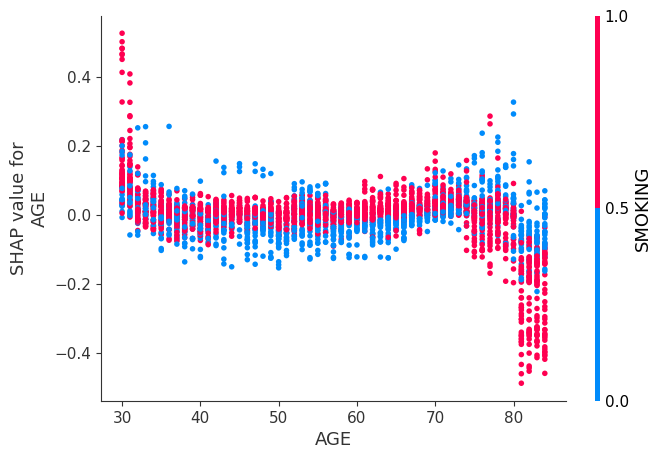

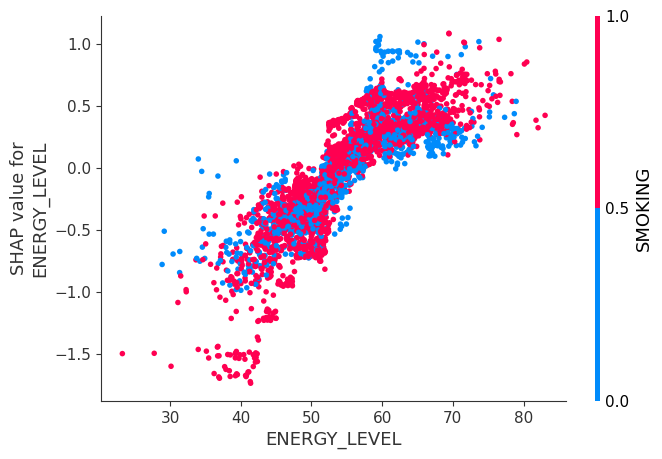

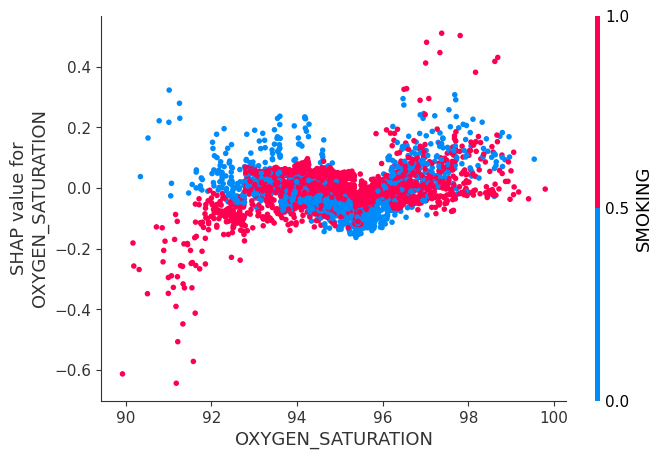

In [73]:
# AGE vs SMOKING
shap.dependence_plot('AGE', shap_values, X_train)

# ENERGY_LEVEL vs SMOKING
shap.dependence_plot('ENERGY_LEVEL', shap_values, X_train)

# OXYGEN_SATURATION vs SMOKING
shap.dependence_plot('OXYGEN_SATURATION', shap_values, X_train)